## Bellabeat: How Can a Wellness Technology Company Play It Smart?

## Introduction
### About Bellabeat
Bellabeat is a high-tech manufacturer of health-focused products for women. Bellabeat is a successful small company, but they have the potential to become a larger player in the global smart device market. Urška Sršen, cofounder and Chief Creative Officer of Bellabeat, believes that analyzing smart device fitness data could help unlock new growth opportunities for the company. 

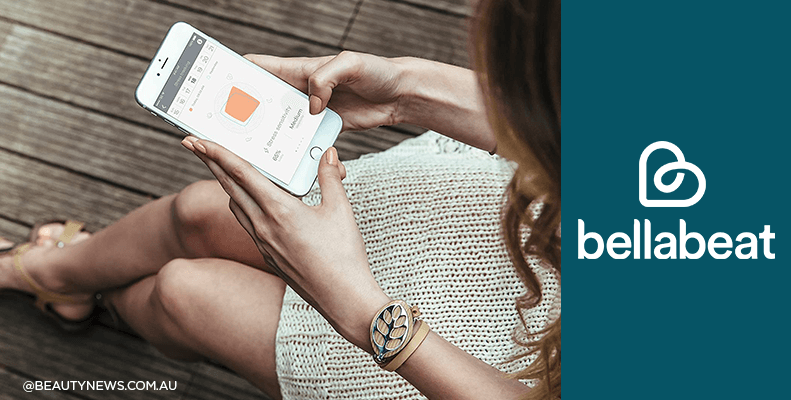

# A tibble: 1 × 7
  format width height colorspace matte filesize density
  <chr>  <int>  <int> <chr>      <lgl>    <int> <chr>  
1 PNG      791    400 sRGB       FALSE   138376 72x72  

In [1]:
magick::image_read('../input/pictures/1.png')


### Business Task
Analyze smart device data to gain insight into how consumers are using their smart devices. Bellabeat is a company who focus on the wellness and health of women. Ths bussiness task will take this into consideration and see how Bellabeat can be differentiated from the competitors. 

## Data Source and Preparation
* The dataset [FitBit Fitness Tracker Data](https://www.kaggle.com/arashnic/fitbit) (CC0: Public Domain, dataset made available through Mobius) from Kaggle is used in this analysis. 
* It contains 18 CSV files and data size is 338MB.
* These data were generated by respondents to a distributed survey via Amazon Mechanical Turk between 03.12.2016-05.12.2016. 
* 30 eligible Fitbit users consented to the submission of personal tracker data, including minute-level output for physical activity, heart rate, and sleep monitoring. The dataset includes information about daily activity, steps, and heart rate that can be used to explore users’ habits.
* After checking these files, we found that some of the tables are overlapped. 3 CSV files contains the merged inforation which we will use for analysis.

### Packages and Libraries

In [2]:
# # # # # # # # # # # # # # # # # # # # # # # 
# Install required packages
# tidyverse for data import and wrangling
# libridate for date functions
# janitor for data cleaning
# skimr for data statistics summary
# # # # # # # # # # # # # # # # # # # # # # #  

library(lubridate) #helps wrangle date attributes
library(tidyverse) #helps wrangle data
library(janitor) #helps clean data
library(skimr)  #helps summarize data
library(dplyr)
library(purrr)


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.5     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.0.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ lubridate::as.difftime() masks base::as.difftime()
✖ lubridate::date()        masks base::date()
✖ dplyr::filter()          masks stats::filter()
✖ lubridate::intersect()   masks base::intersect()
✖ dplyr::lag()             masks stats::lag()
✖ lubridate::setdiff()     masks base::setdiff()
✖ lubridate::union()       masks base::union()


Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test




### Data Limitation
The dataset was collected in 2016 which is old for analysis the trend nowadays.

## Data Cleaning

In [3]:
activity <- read.csv("../input/d/arashnic/fitbit/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")
sleep <- read.csv("../input/d/arashnic/fitbit/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv")
weight <- read.csv("../input/d/arashnic/fitbit/Fitabase Data 4.12.16-5.12.16/weightLogInfo_merged.csv")

In [4]:
# Dataframe Summary
skim_without_charts(activity)

── Data Summary ────────────────────────
                           Values  
Name                       activity
Number of rows             940     
Number of columns          15      
_______________________            
Column type frequency:             
  character                1       
  numeric                  14      
________________________           
Group variables            None    

── Variable type: character ────────────────────────────────────────────────────
  skim_variable n_missing complete_rate   min   max empty n_unique whitespace
1 ActivityDate          0             1     8     9     0       31          0

── Variable type: numeric ──────────────────────────────────────────────────────
   skim_variable            n_missing complete_rate    mean      sd         p0
 1 Id                               0             1 4.86e+9 2.42e+9 1503960366
 2 TotalSteps                       0             1 7.64e+3 5.09e+3          0
 3 TotalDistance                    0     

In [5]:
skim_without_charts(sleep)

── Data Summary ────────────────────────
                           Values
Name                       sleep 
Number of rows             413   
Number of columns          5     
_______________________          
Column type frequency:           
  character                1     
  numeric                  4     
________________________         
Group variables            None  

── Variable type: character ────────────────────────────────────────────────────
  skim_variable n_missing complete_rate   min   max empty n_unique whitespace
1 SleepDay              0             1    20    21     0       31          0

── Variable type: numeric ──────────────────────────────────────────────────────
  skim_variable      n_missing complete_rate          mean      sd         p0
1 Id                         0             1 5000979403.   2.06e+9 1503960366
2 TotalSleepRecords          0             1          1.12 3.46e-1          1
3 TotalMinutesAsleep         0             1        419.   1.18e+

In [6]:
skim_without_charts(weight)

── Data Summary ────────────────────────
                           Values
Name                       weight
Number of rows             67    
Number of columns          8     
_______________________          
Column type frequency:           
  character                2     
  numeric                  6     
________________________         
Group variables            None  

── Variable type: character ────────────────────────────────────────────────────
  skim_variable  n_missing complete_rate   min   max empty n_unique whitespace
1 Date                   0             1    19    21     0       56          0
2 IsManualReport         0             1     4     5     0        2          0

── Variable type: numeric ──────────────────────────────────────────────────────
  skim_variable n_missing complete_rate    mean            sd      p0     p25
1 Id                    0        1      7.01e 9 1950321944.   1.50e 9 6.96e 9
2 WeightKg              0        1      7.20e 1         13.9  

### Column Name Cleaning
Column names are mixed with both uppercase and lowercase. Using "janitor" package to clean variable names and change all the variables to lowercase and add underscore between the words.

In [7]:
activity <- activity %>% clean_names() 
sleep <- sleep %>% clean_names()
weight <- weight %>% clean_names()

In [8]:
#display the updated column names
colnames(activity)

[1] "id"                         "activity_date"             
 [3] "total_steps"                "total_distance"            
 [5] "tracker_distance"           "logged_activities_distance"
 [7] "very_active_distance"       "moderately_active_distance"
 [9] "light_active_distance"      "sedentary_active_distance" 
[11] "very_active_minutes"        "fairly_active_minutes"     
[13] "lightly_active_minutes"     "sedentary_minutes"         
[15] "calories"

In [9]:
colnames(sleep)

[1] "id"                   "sleep_day"            "total_sleep_records" 
[4] "total_minutes_asleep" "total_time_in_bed"

In [10]:
colnames(weight)

[1] "id"               "date"             "weight_kg"        "weight_pounds"   
[5] "fat"              "bmi"              "is_manual_report" "log_id"

### Remove Duplicates

In [11]:
# Check duplicates
activity %>%
  duplicated() %>%
  sum()

[1] 0

In [12]:
sleep %>%
  duplicated() %>%
  sum()

[1] 3

In [13]:
weight %>%
  duplicated() %>%
  sum()

[1] 0

In [14]:
# Remove the duplicate rows
sleep <- sleep %>% distinct()

### Rename Columns
Each dataframe has a column containing date information. Rename the variables "activity_date" and "sleep_day" to "date" so that they are consistent.

In [15]:
# rename activitydate and sleepday to date  
activity <- activity %>% rename(date=activity_date)
sleep <- sleep %>% rename(date=sleep_day)

### Data Type Conversion

In [16]:
# convert date column from character to Date format
activity$date <- as.Date(activity$date, "%m/%d/%Y")
head(activity) 
weight$date <- as.Date(weight$date, "%m/%d/%Y")
head(weight)
sleep$date <- as.Date(sleep$date, "%m/%d/%Y")
head(sleep)

,id,date,total_steps,total_distance,tracker_distance,logged_activities_distance,very_active_distance,moderately_active_distance,light_active_distance,sedentary_active_distance,very_active_minutes,fairly_active_minutes,lightly_active_minutes,sedentary_minutes,calories
,<dbl>,<date>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
1,1503960366,2016-04-12,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
2,1503960366,2016-04-13,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
3,1503960366,2016-04-14,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
4,1503960366,2016-04-15,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
5,1503960366,2016-04-16,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
6,1503960366,2016-04-17,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728


,id,date,weight_kg,weight_pounds,fat,bmi,is_manual_report,log_id
,<dbl>,<date>,<dbl>,<dbl>,<int>,<dbl>,<chr>,<dbl>
1,1503960366,2016-05-02,52.6,115.9631,22,22.65,True,1.462234e+12
2,1503960366,2016-05-03,52.6,115.9631,NA,22.65,True,1.462320e+12
3,1927972279,2016-04-13,133.5,294.3171,NA,47.54,False,1.460510e+12
4,2873212765,2016-04-21,56.7,125.0021,NA,21.45,True,1.461283e+12
5,2873212765,2016-05-12,57.3,126.3249,NA,21.69,True,1.463098e+12
6,4319703577,2016-04-17,72.4,159.6147,25,27.45,True,1.460938e+12


,id,date,total_sleep_records,total_minutes_asleep,total_time_in_bed
,<dbl>,<date>,<int>,<int>,<int>
1,1503960366,2016-04-12,1,327,346
2,1503960366,2016-04-13,2,384,407
3,1503960366,2016-04-15,1,412,442
4,1503960366,2016-04-16,2,340,367
5,1503960366,2016-04-17,1,700,712
6,1503960366,2016-04-19,1,304,320


## Data Analysing
### Add New Columns
* New column "total_activity_time" is added to activity dataframe in order to check if there is any correlation between daily activity time and calories burnt.

In [17]:
activity <- activity %>%
  mutate(total_activity_time=very_active_minutes+fairly_active_minutes+lightly_active_minutes)

* New column "day" is added to show day of week

In [18]:
activity <- activity %>%
  mutate(day=weekdays(date)) 

In [19]:
sleep <- sleep %>%
  mutate(day=weekdays(date)) 



Let's check the number of unique participants in each dataset.

In [20]:
n_distinct(activity$id)
n_distinct(sleep$id)
n_distinct(weight$id)

[1] 33

[1] 24

[1] 8

There are 33 participants in the activity, 24 in the sleep and only 8 in the weight data set. The sample size of 8 participants is limited so won't be included in this anlysis.

In [21]:
# summary statistics for daily activity dataframe
activity %>%
  select(total_steps,
         total_distance,
         sedentary_minutes) %>%
  summary()

  total_steps    total_distance   sedentary_minutes
 Min.   :    0   Min.   : 0.000   Min.   :   0.0   
 1st Qu.: 3790   1st Qu.: 2.620   1st Qu.: 729.8   
 Median : 7406   Median : 5.245   Median :1057.5   
 Mean   : 7638   Mean   : 5.490   Mean   : 991.2   
 3rd Qu.:10727   3rd Qu.: 7.713   3rd Qu.:1229.5   
 Max.   :36019   Max.   :28.030   Max.   :1440.0   

In [22]:
# summary statistics for daily sleep dataframe
sleep %>%  
  select(total_sleep_records,
         total_minutes_asleep,
         total_time_in_bed) %>%
  summary()

 total_sleep_records total_minutes_asleep total_time_in_bed
 Min.   :1.00        Min.   : 58.0        Min.   : 61.0    
 1st Qu.:1.00        1st Qu.:361.0        1st Qu.:403.8    
 Median :1.00        Median :432.5        Median :463.0    
 Mean   :1.12        Mean   :419.2        Mean   :458.5    
 3rd Qu.:1.00        3rd Qu.:490.0        3rd Qu.:526.0    
 Max.   :3.00        Max.   :796.0        Max.   :961.0    

In [23]:
# Merging these two dataframe together
combined_data <- merge(activity, sleep, by = c("date", "id"))
head(combined_data)

,date,id,total_steps,total_distance,tracker_distance,logged_activities_distance,very_active_distance,moderately_active_distance,light_active_distance,sedentary_active_distance,⋯,fairly_active_minutes,lightly_active_minutes,sedentary_minutes,calories,total_activity_time,day.x,total_sleep_records,total_minutes_asleep,total_time_in_bed,day.y
,<date>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<int>,<int>,<int>,<int>,<int>,<chr>,<int>,<int>,<int>,<chr>
1,2016-04-12,1503960366,13162,8.50,8.50,0,1.88,0.55,6.06,0,⋯,13,328,728,1985,366,Tuesday,1,327,346,Tuesday
2,2016-04-12,1927972279,678,0.47,0.47,0,0.00,0.00,0.47,0,⋯,0,55,734,2220,55,Tuesday,3,750,775,Tuesday
3,2016-04-12,2026352035,4414,2.74,2.74,0,0.19,0.35,2.20,0,⋯,8,181,706,1459,192,Tuesday,1,503,546,Tuesday
4,2016-04-12,3977333714,8856,5.98,5.98,0,3.06,0.91,2.01,0,⋯,19,131,777,1450,194,Tuesday,1,274,469,Tuesday
5,2016-04-12,4020332650,8539,6.12,6.12,0,0.15,0.24,5.68,0,⋯,15,331,712,3654,350,Tuesday,1,501,541,Tuesday
6,2016-04-12,4445114986,3276,2.20,2.20,0,0.00,0.00,2.20,0,⋯,0,196,787,2113,196,Tuesday,2,429,457,Tuesday


In [24]:
n_distinct(combined_data$id)

[1] 24

In [25]:
nrow(activity)
nrow(sleep) 

[1] 940

[1] 410


## Data Visualization

### Daily Activity Analysis
Daily activities include steps, walking distance, walking minutes and calories. The following plots shows the correlation among these variables.

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



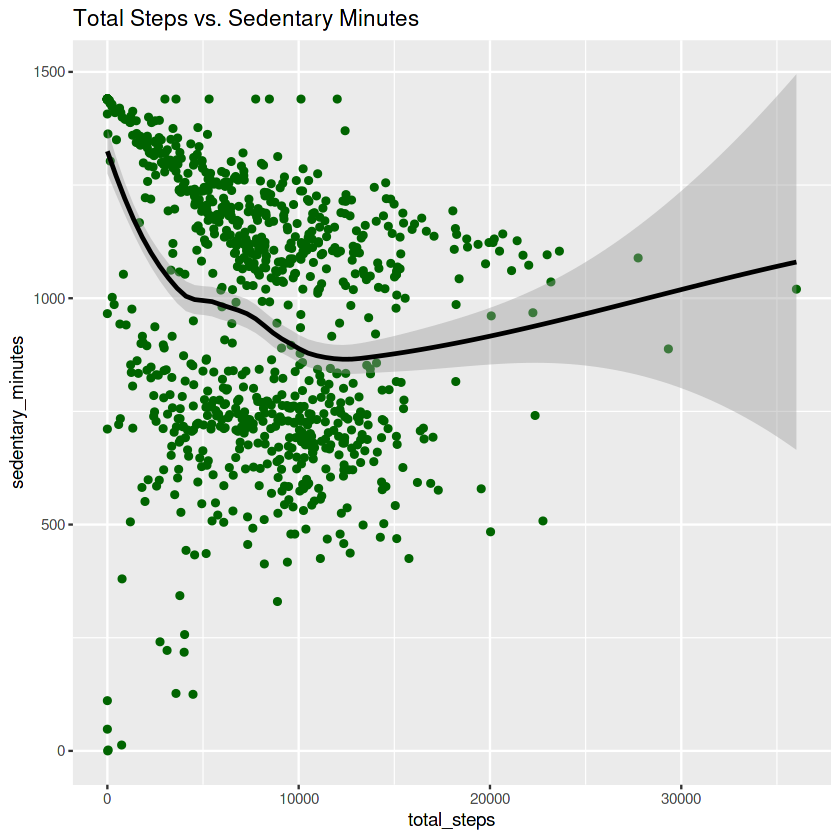

In [26]:
ggplot(data=activity, aes(x=total_steps, y=sedentary_minutes)) + 
  geom_point(color='darkgreen') + geom_smooth(color='black') + 
  labs(title="Total Steps vs. Sedentary Minutes")

* For most of the case, sedentary time will reduce with the increase of steps. 
* This shows sedentary time is a good indicator for daily activities and it may encourage the customers to have more exercises.

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



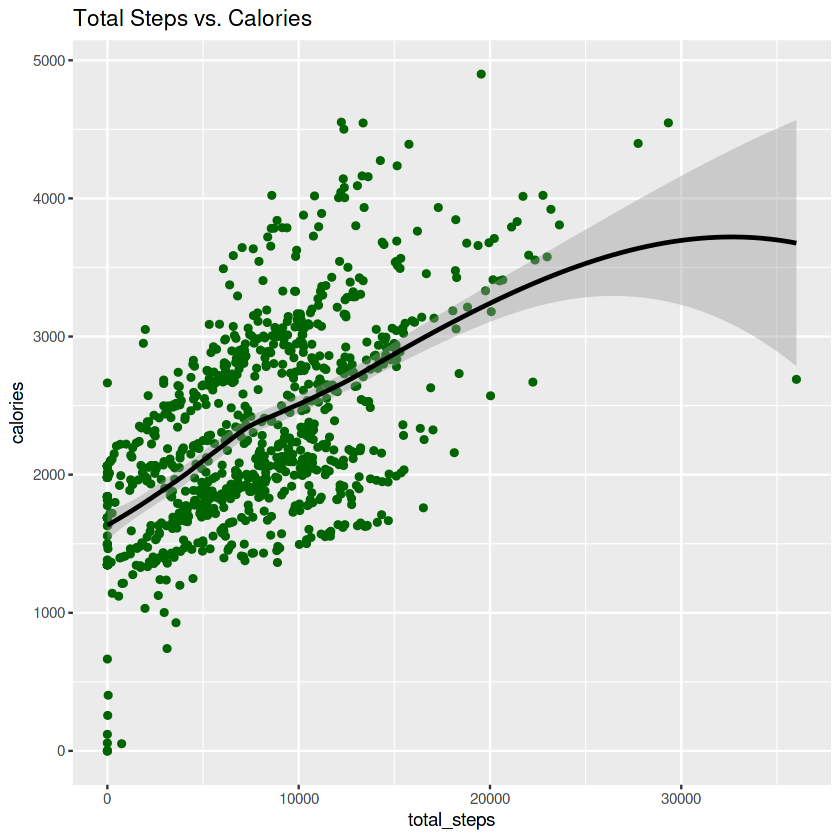

In [27]:
ggplot(data=activity, aes(x=total_steps, y=calories)) + 
  geom_point(color='darkgreen') + geom_smooth(color='black') + 
  labs(title="Total Steps vs. Calories")

* Steps have a positive relationship with calories. 

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



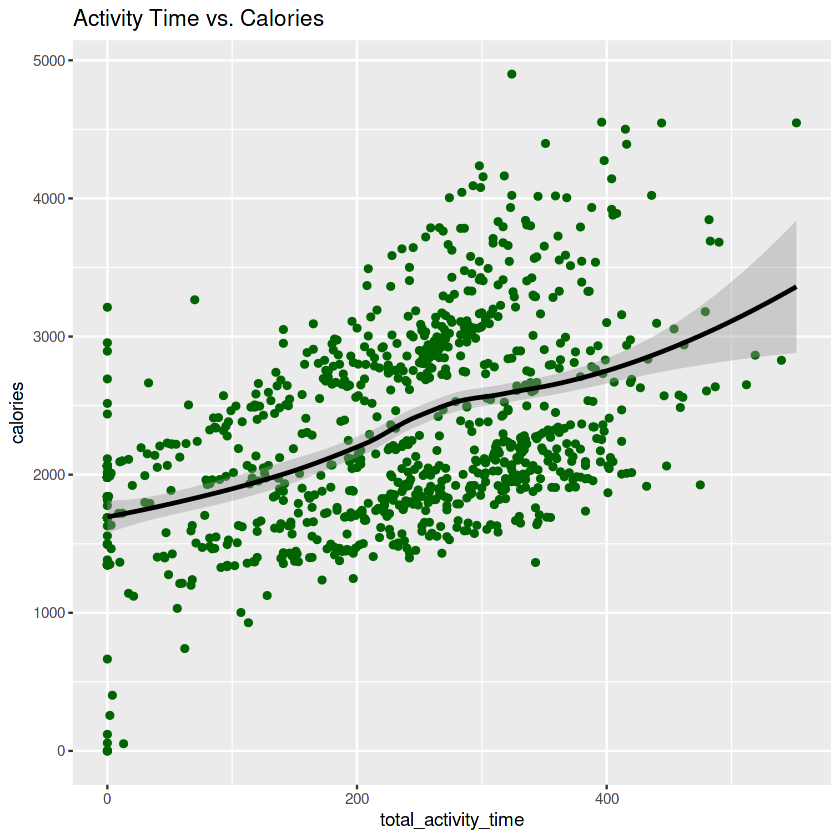

In [28]:
ggplot(data=activity, aes(x=total_activity_time, y=calories)) + 
  geom_point(color='darkgreen') + geom_smooth(color='black') + 
  labs(title="Activity Time vs. Calories")

* Activity time has a positive relationship with calories consumed
* Above plot shows that the longer activity time, the more calories get burnt. 

Loading required package: gridExtra


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




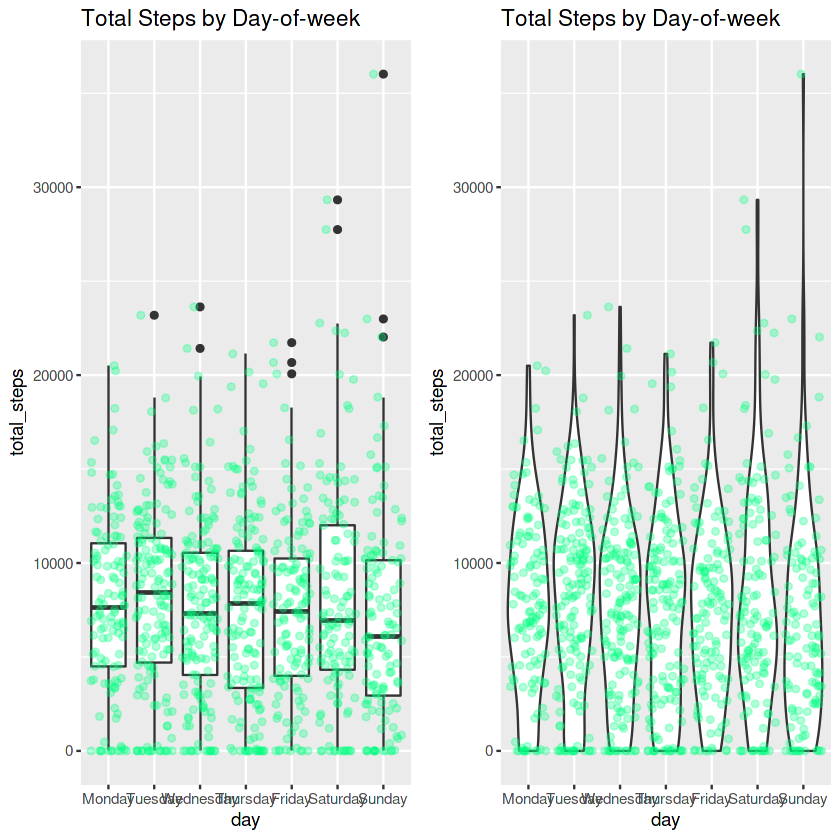

In [29]:
require(gridExtra)
plt1 <- ggplot(data=activity, aes(x = factor(day, weekdays(min(date) + -1:5)), y=total_steps)) + 
  geom_boxplot() + 
  geom_jitter(alpha = 0.3, color = "springgreen") +
  labs(x="day",title="Total Steps by Day-of-week")
plt2 <- ggplot(data=activity, aes(x = factor(day, weekdays(min(date) + -1:5)), y=total_steps)) + 
  geom_violin() + 
  geom_jitter(alpha = 0.3, color = "springgreen") +
  labs(x="day",title="Total Steps by Day-of-week")
grid.arrange(plt1, plt2, ncol=2) 

* The median values during the weekend slightly less than weekdays
* However part of the users have more steps during the weekend compared to the weekdays

#### ECDF of Total Steps by Day

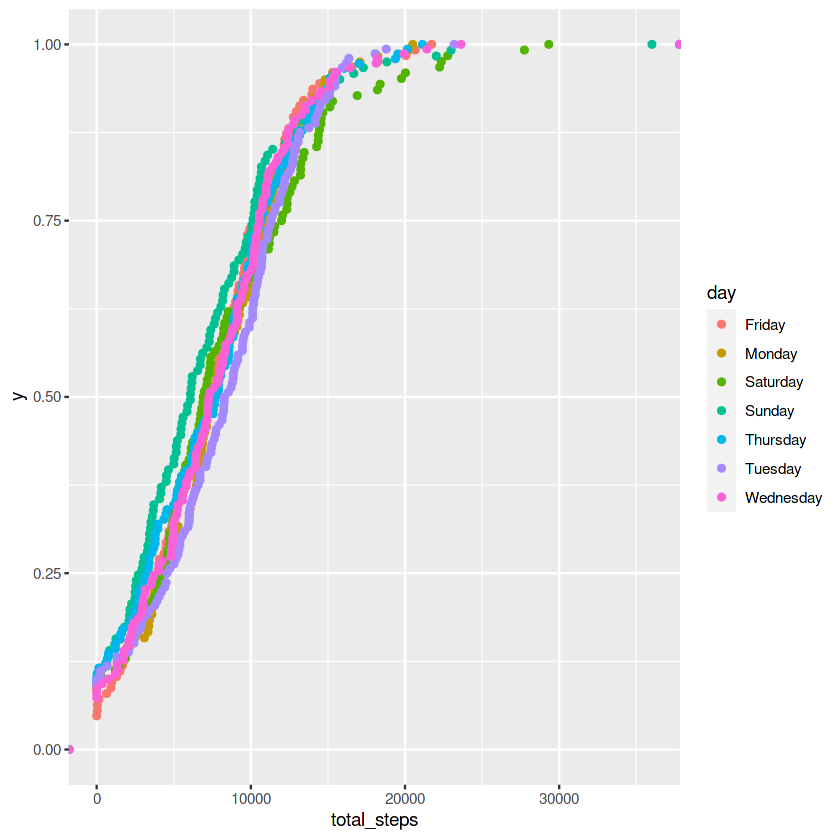

In [30]:
ggplot(data=activity, aes(total_steps, col=day)) + 
stat_ecdf(geom = "point")

In [31]:
activity %>% 
  group_by(day) %>% 
  summarize(quantile(total_steps, probs=0.95))

day,"quantile(total_steps, probs = 0.95)"
<chr>,<dbl>
Friday,14991.25
Monday,14842.95
Saturday,19561.70
Sunday,15764.00
Thursday,15142.00
Tuesday,15482.90
Wednesday,15235.75


* 5% of users have about 5,000 more steps on Saturday compare to other days

#### Activity time vs. Day-of-the-Week

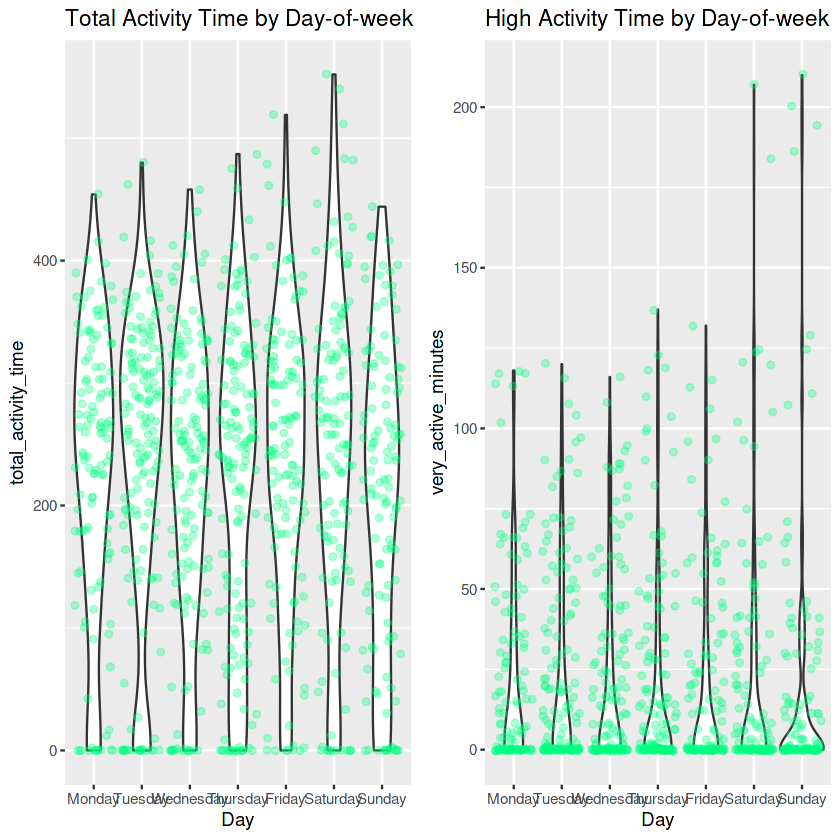

In [32]:
require(gridExtra)
plt1 <- ggplot(data=activity, aes(x=factor(day, weekdays(min(date) + -1:5)), y=total_activity_time)) + 
  geom_violin() + 
  geom_jitter(alpha = 0.3, color = "springgreen") +
  labs(x="Day",title="Total Activity Time by Day-of-week")

plt2 <- ggplot(data=activity, aes(x=factor(day, weekdays(min(date) + -1:5)), y=very_active_minutes)) + 
  geom_violin() + 
  geom_jitter(alpha = 0.3, color = "springgreen") +
  labs(x="Day",title="High Activity Time by Day-of-week")

grid.arrange(plt1, plt2, ncol=2) 

* There is not much difference about the total activity time across the week
* In terms of very active time, the distribution shows some consumers have intense activity during the weekend

### Daily Sleep Analysis

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



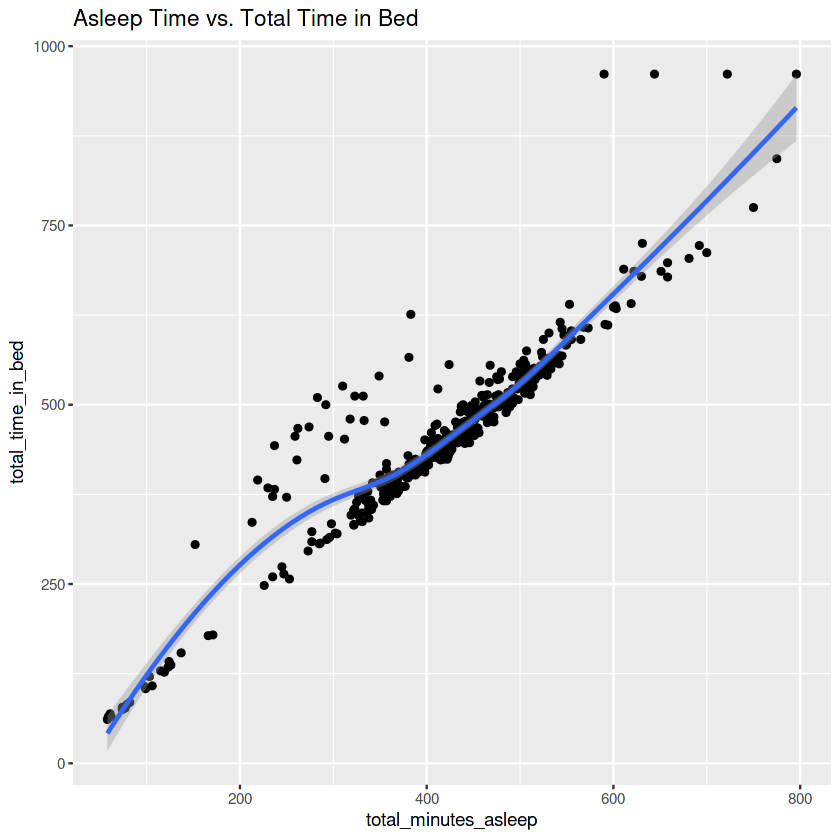

In [33]:
ggplot(data=sleep, aes(x=total_minutes_asleep, y=total_time_in_bed)) + 
  geom_point() + 
  geom_smooth() +
  labs(title="Asleep Time vs. Total Time in Bed")

* The relationship between minutes asleep and time in bed is almost completely linear.

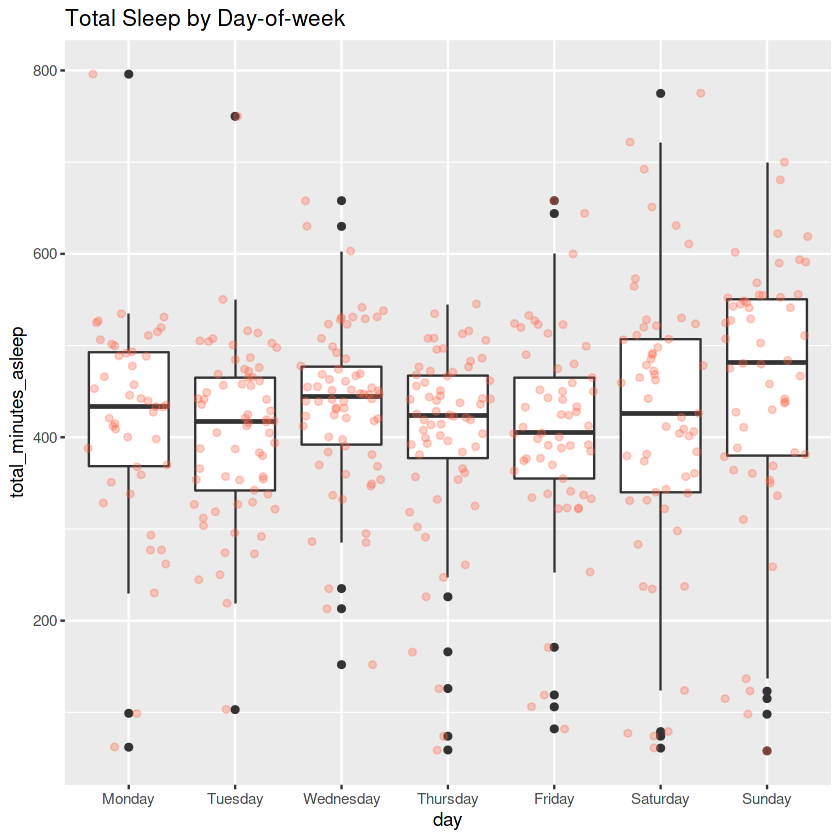

In [34]:
ggplot(data=sleep, aes(x=factor(day, weekdays(min(date) + -1:5)), y=total_minutes_asleep)) + 
  geom_boxplot() + 
  geom_jitter(alpha = 0.3, color = "tomato") +
  labs(x="day",title="Total Sleep by Day-of-week")

* During weekend the sleep time has larger variation
* The median value on Sunday is slightly higher than other days

### Activity and Sleep Correlation

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



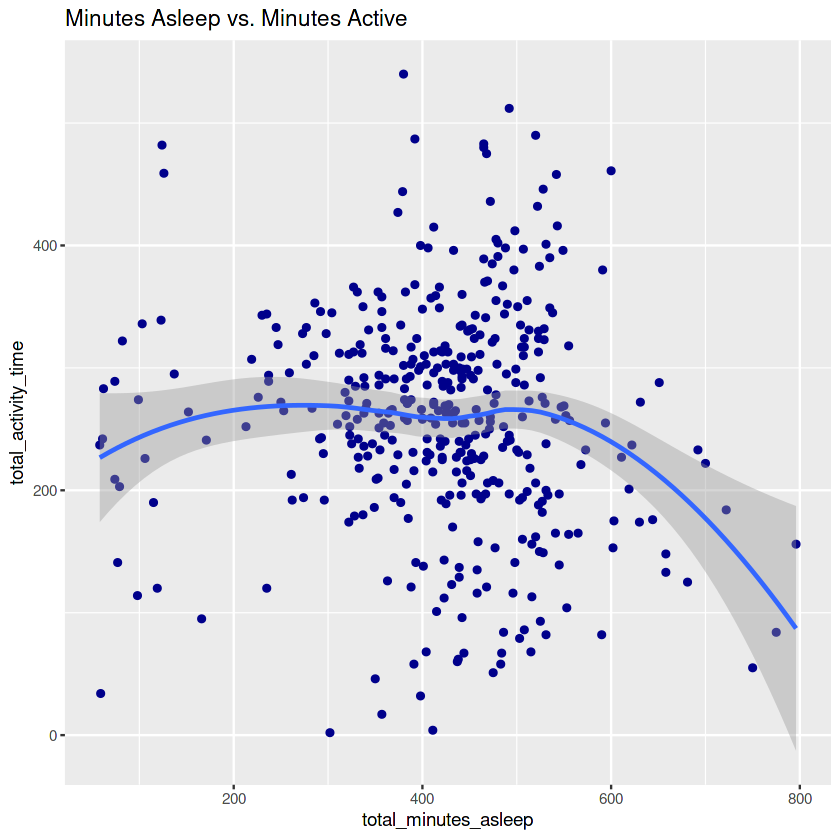

In [35]:
ggplot(data=combined_data, aes(x=total_minutes_asleep, y=total_activity_time)) + 
geom_point(color='darkblue') + 
  geom_smooth() +
  labs(title="Minutes Asleep vs. Minutes Active")

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



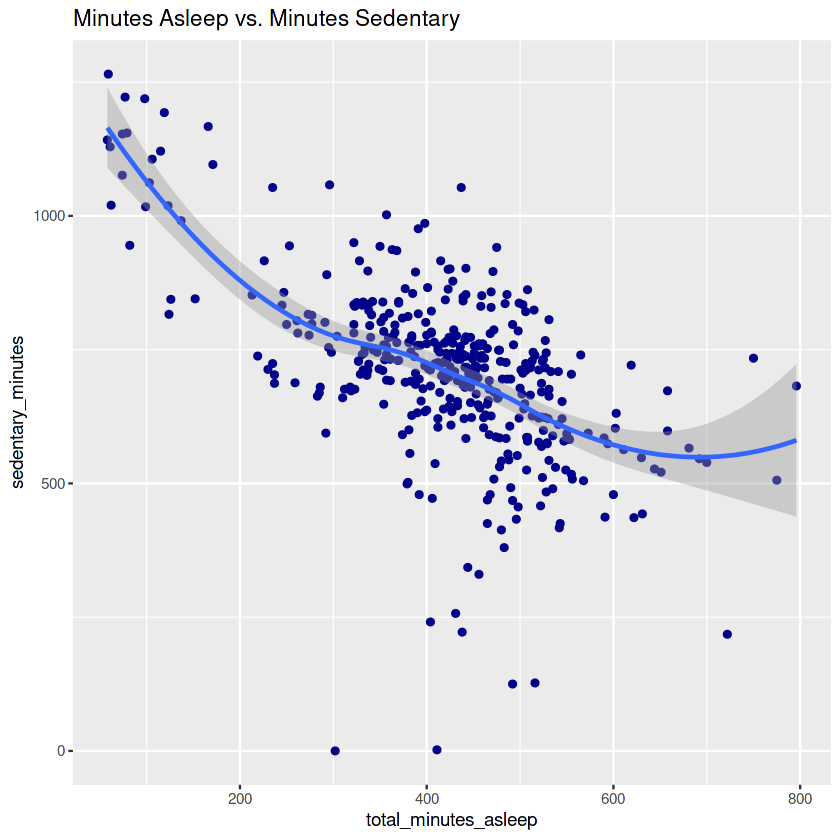

In [36]:
ggplot(data=combined_data, aes(x=total_minutes_asleep, y=sedentary_minutes)) + 
geom_point(color='darkblue') + 
  geom_smooth() +
  labs(title="Minutes Asleep vs. Minutes Sedentary")

## Summary and Recommendations

With the development of smart devices, consumers' life gets increasingly smarter. Based on the analysis of Fitbit tracker trend, we have a summary and recommendations about Bellabeat APP.

### Weight
* Not enough users record their weight information. Bellabeat may consider set up a reminder function to encourage customers recording their weight for better weight management.

### Sleep
* Average sleep time are less than eight hours. Average inbed time is 459 minutes and average asleep time is 419 minutes. Further features like sleep quality or sleep target can be added to the APP.
* During weekend the sleep time has larger variation which shows users sleep pattern changes on the weekends. It is good to add sleep pattern summary into the App to help the users manage their sleep.

### Activity
* 5% of people have more practice on Saturday with 5,000 more steps. 
* Average daily steps is 7,638 which is less than the recommended 10,000 steps (https://www.10000steps.org.au/articles/counting-steps/). Further features like daily target or activity intensity indicator can be added to the APP.
* By incorporating wearables and wellness, Bellabeat APP can collect more data regarding women's health like hydration level and meditation.